# **Fraud Detection (Mock Project)**
## **Exploratory Analysis, Model Evaluation, Fraud Detection Rules, and Fraud Prevention Recommendations**
### **Project Overview**
This notebook presents a **mock fraud detection analysis** using a **synthetic dataset** designed to replicate real-world fraud patterns. The purpose of this project is to **demonstrate fraud detection techniques** rather than analyze real company data.  
It explores model improvements, feature selection, and fraud prevention rules, comparing fraud scores from an old and newly trained machine learning model.  

The analysis includes:

- **Data Cleaning & Preprocessing**
- **Exploratory Data Analysis (EDA)**
- **Old vs New Fraud Detection Model Comparison**
- **Fraud Prevention Rules & Business Recommendations**

*Note: This is a mock project created for learning and demonstration purposes. The dataset and analysis are synthetic and do not represent any real-world company or confidential data.*  

### **Author**: *Aswathy Nandakumar*  
#### **Date**: February 1, 2025


## **1. Import Libraries**  


To conduct comprehensive fraud detection analysis, we import essential Python libraries:  

- **pandas**: For data manipulation and analysis, hence for efficient handling of structured data.  
- **numpy**: Provides numerical computing capabilities, including array operations and mathematical functions.  
- **matplotlib & seaborn**: Used for data visualization to find trends, patterns & anomalies in dataset.  
- **matplotlib.dates**: Helps in formatting & handling date-based visualizations.  
- **warnings**: Suppress unnecessary warning messages to enhance notebook readability.
- **scikit-learn (sklearn)**: A machine learning library used for model evaluation, including precision-recall, AUC-ROC analysis, and fraud detection performance metrics.
- **imbalanced-learn (imblearn)**: A machine learning library for handling imbalanced datasets. It includes SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples to improve fraud detection in imbalanced datasets.

These libraries collectively support **data cleaning, exploratory analysis, visualization, model evaluation and handling imbalanced data**, ensuring a structured and insightful approach to fraud detection.

In [89]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

# Ignore warning messages in notebook, for better readability
warnings.filterwarnings("ignore")

# Set visualization style (Sets the default visualization style to "whitegrid" in Seaborn)
sns.set_style("whitegrid")


## **2. Load the Dataset**

Dataset contains transaction details, fraud detection model scores & fraud labels.  
First step is to load data and check its structure.

In [92]:
# Load dataset
df = pd.read_csv("Fraud data.csv")

# Display first few rows
df.head()


,networkGrowthFeature15,timeBetweenOrdersFeature15,totalOrderValueFeature1,skuPopularityFeature21,maxOrderValueDeviationFeature,latestOrderPriceFeature15,totalOrderValueFeature25,successfulOrderValueFeature32,successfulOrderValueFeature47,skuCountFeature25,...,skuPopularityFeature35,orderPriceFeature28,orderPriceFeature37,customerId,accountAgeFeature24,anonymousFeature99,oldModelScore,newModelScore,orderTime,customerStatus
0,41.221374,4,3.852355,1.044372e-01,-0.008416,0.756341,3.852355,3.852355,0.963089,1225.0,...,3.441884e-02,0.963089,0.963089,CUSTOMER_ID0,4,1.0,0.440960,0.435500,2021-09-15 21:09:10.669000+00:00,confirmed_fraudster
1,0.005096,70648,14.722513,-9.999999e+06,1.503069,4.247818,7.342932,11.416230,0.000162,121.0,...,-9.999999e+06,3.805410,3.680628,CUSTOMER_ID1,70649,1.0,0.294474,0.266929,2021-09-03 11:26:59.080000+00:00,confirmed_fraudster
2,69.230769,2,1.362888,0.000000e+00,0.033153,0.198355,1.362888,1.362888,0.681444,2015.0,...,0.000000e+00,0.681444,0.681444,CUSTOMER_ID2,2,1.0,0.167179,0.354355,2021-09-16 21:41:28.993000+00:00,confirmed_fraudster
3,106.930693,6,1.928881,0.000000e+00,0.405989,1.820468,1.928881,1.928881,0.321480,248.0,...,0.000000e+00,1.928881,1.928881,CUSTOMER_ID3,8,1.0,0.166325,0.436701,2021-08-31 00:08:34.672000+00:00,confirmed_fraudster
4,10800.000000,5,0.707547,0.000000e+00,-0.145098,0.547956,0.707547,0.707547,0.141509,8.0,...,0.000000e+00,0.707547,0.707547,CUSTOMER_ID4,5,-9999999.0,0.152880,0.151335,2021-11-05 11:43:48.559000+00:00,confirmed_fraudster


#### **Initial Observations**
- Dataset consists of **38 columns** & contain various numerical features.
- Some features, like `timeBetweenOrdersFeature1`, have large numerical values, while others, like `totalOrderValueFeature1`, contain decimal values.
- There are potential placeholder values (`-9.999999e+06`) in `skuPopularityFeature21`, which may indicate missing or erroneous data.
- More detailed data quality check is required to handle missing values, duplicates and feature distributions.



### **Next Steps**
We will now:
1. Analyze dataset structure, including data types and categorical values.
2. Identify missing values and placeholders.
3. Check for duplicate rows and columns.

## **3. Dataset Overview, Missing Values, and Duplicate Data**

Before analyzing fraud trends, important to check dataset's quality and structure. This section examines:

### **3.1 Dataset Structure**
- Displays an overview of the dataset, including column names, data types, and memory usage.
- Helps in identifying categorical and numerical variables.

### **3.2 Unique Values in Categorical Columns**
- Lists unique values in categorical columns to check for consistency.
- Useful for detecting anomalies or incorrect data entries.

### **3.3 Missing Values Analysis**
- Identifies missing values, including placeholder values such as `-9999999`, which may indicate missing or incorrect data.
- Provides insights into which features require imputation or handling.

### **3.4 Duplicate Data Check**
- **Duplicate Rows:** Counts repeated transactions, which could indicate data entry errors or fraudulent activities.
- **Duplicate Columns:** Identifies features with identical data, helping in dimensionality reduction.

### **Next Steps**


In [97]:
# Check basic details about the dataset
print("Dataset Overview:")
print(df.info())

# Check unique values in categorical column
print("\nUnique values in categorical columns:")
print(df.select_dtypes(include=['object']).nunique())

# Identify missing values
print("\nMissing Values:")
print(df.isin(["-9999999",-9999999, None, ""]).sum()) # dataset contains -9999999 in string form also (eg. isEWallet column)

# Check duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Function to find duplicate columns
def find_duplicate_columns(df):
    duplicate_columns = []
    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                duplicate_columns.append((columns[i], columns[j]))
    return duplicate_columns

# Identify duplicate column
duplicate_cols = find_duplicate_columns(df)

# Display duplicate column results
if duplicate_cols:
    print("\nDuplicate columns found:", duplicate_cols)
else:
    print("\nNo duplicate column found.")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   networkGrowthFeature15          10800 non-null  float64
 1   timeBetweenOrdersFeature15      10800 non-null  int64  
 2   totalOrderValueFeature1         10800 non-null  float64
 3   skuPopularityFeature21          10800 non-null  float64
 4   maxOrderValueDeviationFeature   10800 non-null  float64
 5   latestOrderPriceFeature15       10800 non-null  float64
 6   totalOrderValueFeature25        10800 non-null  float64
 7   successfulOrderValueFeature32   10800 non-null  float64
 8   successfulOrderValueFeature47   10800 non-null  float64
 9   skuCountFeature25               10800 non-null  float64
 10  orderNumberFeature42            10800 non-null  float64
 11  skueValueFeature3               10800 non-null  float64
 12  marketCountry 

#### **Key Findings**
- **Dataset Overview:**
  - The dataset contains **10,800 records** with **38 features**.
  - Features are a mix of **float, integer, and object (categorical) types**.
  - **`orderTime`** is a **datetime column** that requires conversion for time-based analysis.

- **Missing Values:**
  - **`skuPopularityFeature21` and `skuPopularityFeature24`** have **7,228 missing values** (~67% missing).
  - **`anonymousFeature99` has 4,025 missing values** (~37% missing).
  - Other features have minimal or no missing values.

- **Duplicate Data:**
  - **No duplicate rows** were found.
  - **One pair of duplicate columns (`accountAgeFeature12` and `accountAgeFeature24`)** was identified.

#### **Key Insights**
- High missing values in some columns suggest the need for **imputation or removal** to maintain data integrity.
- The presence of a **duplicate column** indicates redundant data, which should be removed.
- **Categorical features (`marketCountry`, `customerStatus`, etc.)** require encoding for further analysis.



### **Next Steps**
1. **Handle missing values:**
   - Drop features with **excessive missing values** (≥ 50%).
   - Impute missing values in numerical columns using **median**.

2. **Remove redundant features:**
   - Drop one copy of the **duplicate column** (`accountAgeFeature24`).

3. **Prepare the dataset for modeling:**
   - Convert **categorical variables** into numerical format.
   - Standardize the **datetime column (`orderTime`)** for time-based trend analysis.


## **4. Data Cleaning & Preprocessing**

To improve fraud detection accuracy, it is essential to clean and preprocess the dataset by removing unnecessary information, handling missing values, and standardizing data formats. This section includes:

### **4.1 Removing Irrelevant and Redundant Columns**
- **Dropped categorical identifier columns** that are not useful for modeling but retained `customerId` as it is needed for fraud rule analysis.
- **Removed duplicate columns** (kept `accountAgeFeature12` and dropped `accountAgeFeature24`).
- **Eliminated columns with excessive missing values** (≥ 50%) to maintain data quality (`skuPopularityFeature21`, `isEWallet`, etc.).

### **4.2 Handling Missing Values**
- **Replaced placeholder values (-9999999) with NaN** to correctly identify missing data.
- **Filled missing values in numerical columns using the median**, ensuring robust imputation without skewing distributions.

### **4.3 Formatting and Encoding**
- **Converted categorical features (e.g., `isEWallet`) into numerical format** for seamless modeling.
- **Standardized `orderTime` to datetime format** for time-based fraud analysis.

### **Key Outcomes**
- **No duplicate rows** remained after column removals.
- **Data is now clean and structured**, ready for further analysis and fraud detection modeling.



In [102]:
# customerId column an identifier, so not to be used for modeling;
# but customerId column can't be dropped as it is later needed in framing fraud rules
# customerStatus is a categorical column and very important for analysis, so it is converted to numeric data type later

# Drop marketCountry column as it is categorical and not used in the analysis
columns_to_drop = ["marketCountry"]

# Drop one copy of duplicate column (keeping first only)
columns_to_drop += ["accountAgeFeature24"]  # Keeping "accountAgeFeature12" as both are identical

# Drop columns with 50% or more missing values as identified from above analysis; isEWallet categorical column with ~ 95% missing data
columns_to_drop += ["skuPopularityFeature21", "isEWallet", "skuPopularityFeature24", "skuPopularityFeature35", "anonymousFeature99"]

# Drop identified columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Check duplicate rows after dropping columns
print("\nDuplicate rows after dropping the columns not required for further analysis:", df_cleaned.duplicated().sum())

# Replace placeholder (-9999999) data with NaN
df_cleaned.replace(-9999999, np.nan, inplace=True)

# Fill missing values with median for numerical columns
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda col: col.fillna(col.median()))

# Convert orderTime to datetime; this categorical column can't be dropped as it is needed later for time series analysis and for framing fraud rules
df_cleaned['orderTime'] = pd.to_datetime(df_cleaned['orderTime'], errors='coerce')

# Save cleaned dataset for later analysis
df_cleaned.to_csv("cleaned_task_fraud_rate.csv", index=False)

print("\nData cleaning completed.\n")



Duplicate rows after dropping the columns not required for further analysis: 0

Data cleaning completed.



### **Next Steps**
- Perform **Exploratory Data Analysis (EDA)** to uncover patterns and relationships.
- Identify key fraud indicators based on trends in the cleaned dataset.

## **5. Exploratory Data Analysis (EDA)**

Understanding fraud patterns is crucial for designing effective detection strategies. This section explores:
- **Fraud vs. Genuine Transaction Distribution**
- **Feature Correlation with Fraud**
- **Time-Based Fraud Patterns**

### **5.1 Fraud vs. Genuine Transaction Distribution**
The **Fraud vs. Genuine Transaction Distribution** section analyzes **class imbalance**, which impacts fraud detection models. Understanding class distribution is crucial before building an effective model.



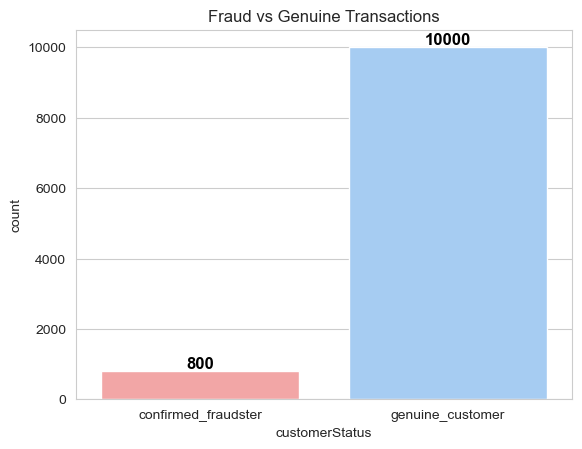

In [106]:
# Define custom light red & light blue colors
custom_palette = {"confirmed_fraudster": "#FF9999",  # Light Red
                  "genuine_customer": "#99CCFF"}    # Light Blue

# Create bar plot to show fraud distribution
bl = sns.countplot(x='customerStatus', data=df_cleaned, palette=custom_palette)

# To add values on top of bar
for p in bl.patches:
    bl.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("Fraud vs Genuine Transactions")
plt.show()


#### **Key Findings**
- The dataset is highly **imbalanced**, with **800 fraudulent transactions** vs. **10,000 genuine transactions**.
- **Fraud Rate = 7.4%** => class imbalance problem
- In case of imbalance, machine learning models tend to be biased toward the majority class, making fraud harder to detect.

#### **Next Steps**
**Resampling techniques like SMOTE** can help balance dataset, improving model performance.



#### **Addressing Class Imbalance with SMOTE**
To ensure fair learning:
1. **Split the dataset** into train-test sets, preserving real-world fraud proportions in the test set.
2. **Apply SMOTE** to generate synthetic fraud samples, balancing the training set.

This approach helps us avoid model bias toward the majority class while keeping a representative test set.



In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Work on copy of df_cleaned to preserve original
df_smote_work = df_cleaned.copy()

# 2. Separate features (X) and target (y)
X = df_smote_work.drop('customerStatus', axis=1)
y = df_smote_work['customerStatus']

# 2.1. Identify non-numeric columns (we want only numeric features for SMOTE)
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns found:", non_numeric_cols.tolist())

# 2.2. Drop non-numeric columns from X
X = X.drop(non_numeric_cols, axis=1)

# 3. Train-Test Split (stratify=y to maintain class proportion in each split)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Class distribution in y_train before SMOTE:")
print(y_train.value_counts())

# 4. Fill missing values in X_train (numeric columns only)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# 5. Apply SMOTE on the training set only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("\nClass distribution in y_train after SMOTE:")
print(pd.Series(y_train_sm).value_counts())

# 6. Combine resampled features + target into a DataFrame for further analysis
df_train_sm = pd.concat([
    pd.DataFrame(X_train_sm, columns=X_train.columns),
    pd.Series(y_train_sm, name='customerStatus')
], axis=1)

print("\nHead of SMOTE-resampled training data:")
print(df_train_sm.head())


Non-numeric columns found: ['customerId', 'orderTime']
Class distribution in y_train before SMOTE:
customerStatus
genuine_customer       8000
confirmed_fraudster     640
Name: count, dtype: int64

Class distribution in y_train after SMOTE:
customerStatus
genuine_customer       8000
confirmed_fraudster    8000
Name: count, dtype: int64

Head of SMOTE-resampled training data:
   networkGrowthFeature15  timeBetweenOrdersFeature15  \
0              171.428571                           2   
1                0.000498                     1198502   
2             3600.000000                           5   
3                0.000531                     1016471   
4               53.932584                           4   

   totalOrderValueFeature1  maxOrderValueDeviationFeature  \
0                 2.267779                       0.546230   
1                10.810484                       1.207429   
2                 5.999079                       2.133470   
3                17.393382          

##### **Key Findings**
- **Before SMOTE:** 640 fraud cases vs. 8000 genuine cases in the training set.
- **After SMOTE:** Balanced **8000 fraud vs. 8000 genuine cases** in training.
- This ensures fraud patterns are adequately learned without model bias.



### **5.2 Feature Correlation with Fraud**
In this sub-section, we 
- Plot the **Correlation Matrix**
- Understand the **correlation values** for the features in dataset



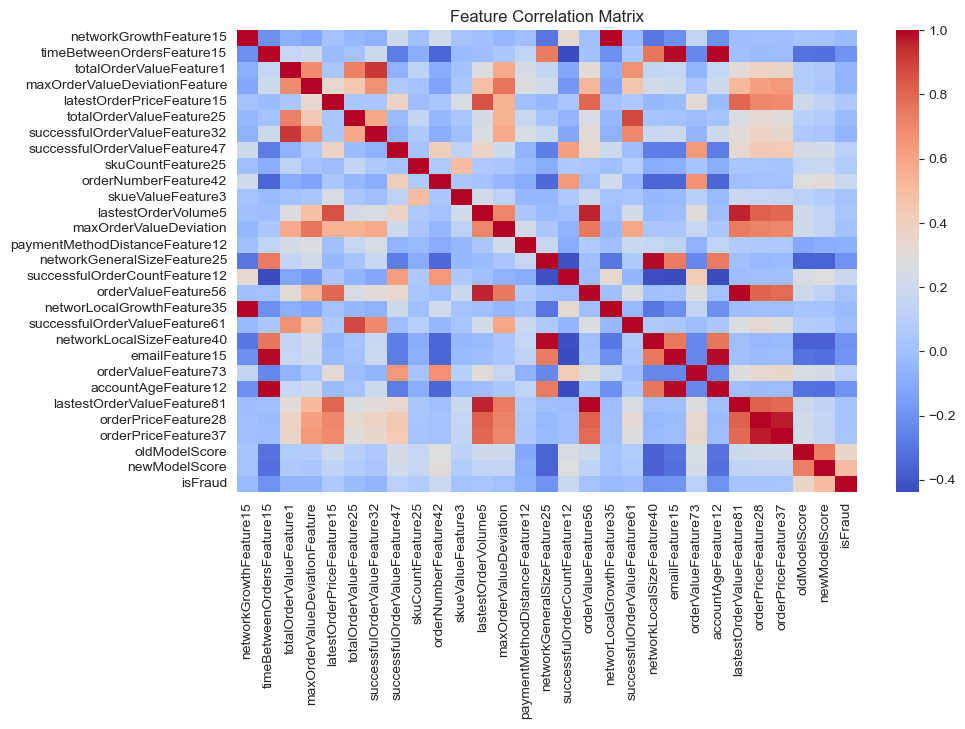

,Feature,Correlation with Fraud
0,isFraud,1.000000
1,newModelScore,0.496527
2,oldModelScore,0.358028
3,orderNumberFeature42,0.187297
4,successfulOrderCountFeature12,0.183773
5,orderValueFeature73,0.112052
6,successfulOrderValueFeature47,0.112012
7,skuCountFeature25,0.074415
8,latestOrderPriceFeature15,0.055135
9,lastestOrderVolume5,0.028607


In [112]:
# Creating a numerical column 'isFraud' for 'customerStatus' column
df_cleaned["isFraud"] = df_cleaned["customerStatus"].apply(lambda x: 1 if x == "confirmed_fraudster" else 0)

# Save above dataset for later analysis
df_cleaned.to_csv("cleaned_task_fraud_rate_with_isFraud.csv", index=False)

# Select only numeric columns for correlation
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix to analyze relationships between numeric features
corr_matrix = numeric_df.corr()

# Plot the correlation matrix/heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Extract fraud correlation values
fraud_correlation = corr_matrix["isFraud"].sort_values(ascending=False)

# Convert to DataFrame & rename columns for better presentation
fraud_correlation_df = fraud_correlation.reset_index().rename(columns={
    "index": "Feature",
    "isFraud": "Correlation with Fraud"
})

# Remove serial numbers by setting "Feature" as the index
fraud_correlation_df = fraud_correlation_df.set_index("Feature")

# Reset index to ensure proper column alignment
fraud_correlation_df = fraud_correlation_df.reset_index()

# Display the formatted table without index
display(fraud_correlation_df)


#### **Key Findings**
Fraud detection depends on identifying **strongly correlated features** i.e. Selecting key features for fraud detection:
- **Positively correlated features** (indicating higher fraud risk):
  - `newModelScore`, `oldModelScore`, `orderNumberFeature42`, `successfulOrderCountFeature73`, `skuCountFeature47`
- **Negatively correlated features** (indicating genuine behavior):
  - `timeBetweenOrdersFeature15`, `networkLocalSizeFeature25`, `networkGeneralSizeFeature15`
- `newModelScore` has the **strongest correlation with fraud**, validating the new fraud detection model.
- Behavioral features like `timeBetweenOrdersFeature15` help differentiate fraudsters from genuine users.
- Feature selection will **improve model accuracy** while reducing unnecessary complexity.
  
##### **Key Insights - Feature Selection for Fraud Detection**
- Features related to **order volume, fraud risk scores, and behavioral patterns** are most predictive.
- **Negatively correlated features help reduce false positives**, ensuring genuine customers are not flagged.




### **5.3 Time-Based Fraud Patterns and Insights**
Fraudulent activities often follow specific time-based trends. Analyzing these patterns helps: 
- **Detect suspicious spikes** in fraud activity.
- **Identify high-risk time windows** for fraud prevention strategies.

Here, we try to answer following questions:
- Are fraudsters more active at specific times of the day?
- Are fraud rates higher on some days of the week?
- How has fraud evolved over dataset's time period?

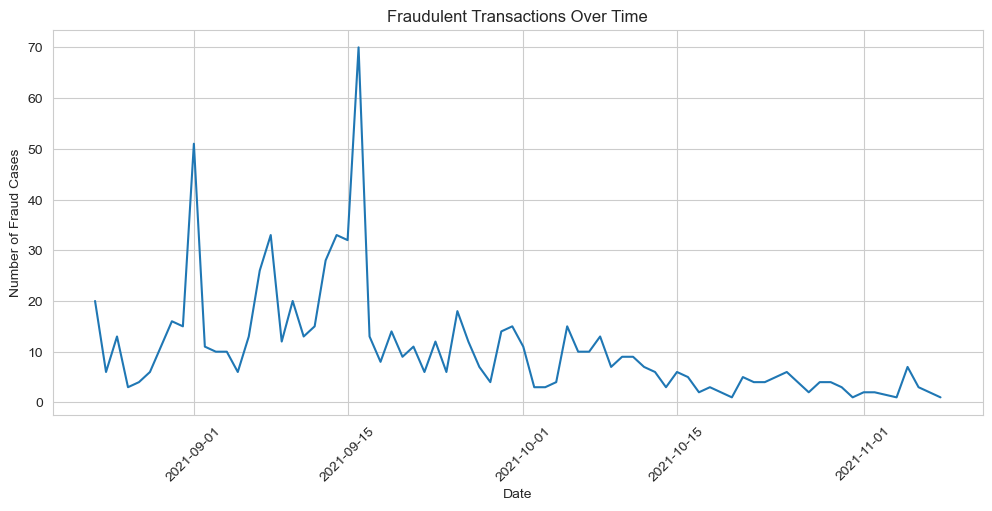

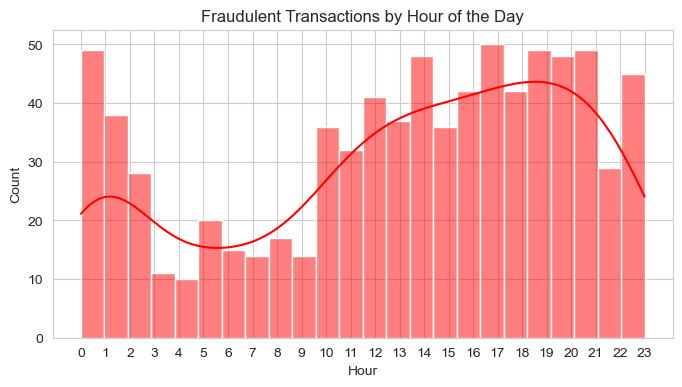

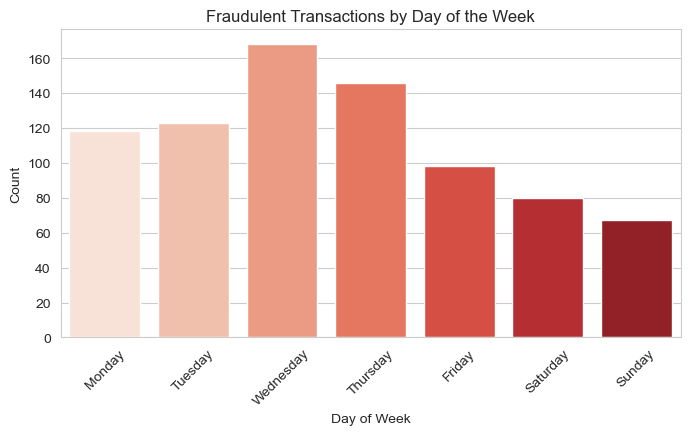

In [115]:
#### 1. Fraud Trends Over Time
plt.figure(figsize=(12,5))
df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"].groupby(df_cleaned['orderTime'].dt.date).size().plot()
plt.title("Fraudulent Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=45)
plt.show()

## 2. Fraud Distribution by Hour of the Day
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]['orderTime'].dt.hour, bins=24, kde=True, color="red")
plt.title("Fraudulent Transactions by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(range(0,24))
plt.show()

## 3. Fraud Distribution by Day of the Week
plt.figure(figsize=(8,4))
sns.countplot(x=df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]['orderTime'].dt.day_name(), 
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
              palette="Reds")
plt.title("Fraudulent Transactions by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### **Key Insights from Time Analysis**
- **Fraud peaks mid-September**, possibly indicating a coordinated attack.
- **Fraud rates are highest between 4 PM - 9 PM** and some **spike during midnight**, suggesting fraudsters operate in the evening and towards midnight
- **Wednesday and Thursday have the most fraud cases**, indicating a mid-week pattern.


### **Next Steps**
- **Enhance fraud detection models** by incorporating time-based risk factors.
- **Optimize fraud rules** by increasing security measures during high-risk periods.
  

## **6. Comparing Old and New Fraud Detection Models**

This section evaluates the **effectiveness** of the **Old vs. New fraud detection models** based on fraud score distributions, statistical metrics, and performance evaluation. The goal is to determine **which model better identifies fraudulent transactions while minimizing false positives**.

This section includes:
- **6.1 Fraud Score Distributions**
- **6.2 Model Performance for Fraudsters and Genuine Customers**
- **6.3 Threshold-Based Fraud Prevention**
- **6.4 Precision-Recall & AUC-ROC Analysis**
- **Key Findings** (for each sub-section above)
- **Final Insights & Recommendation**

### **6.1 Fraud Score Distributions**
- KDE plots visualize the fraud score distributions assigned by both models.
- Helps assess whether the **New Model** provides better separation between fraudulent and genuine transactions.

### **6.2 Model Performance for Fraudsters and Genuine Customers**
- **Confirmed Fraudsters**: Comparing mean fraud scores of both models to see which assigns higher risk scores.
- **Genuine Customers**: Ensuring that legitimate transactions are not falsely flagged.

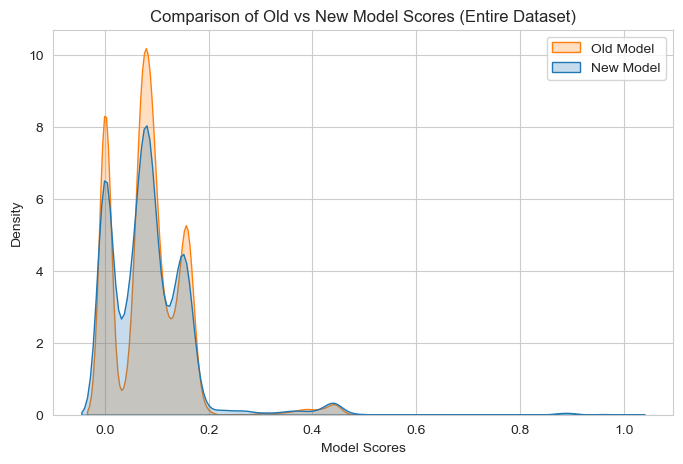

Summary Statistics for Model Scores (Entire Dataset):
       oldModelScore  newModelScore
count   10800.000000   10800.000000
mean        0.085002       0.088036
std         0.073905       0.097330
min         0.000000       0.000000
25%         0.043333       0.031629
50%         0.080833       0.077864
75%         0.120469       0.125241
max         0.658793       0.995500


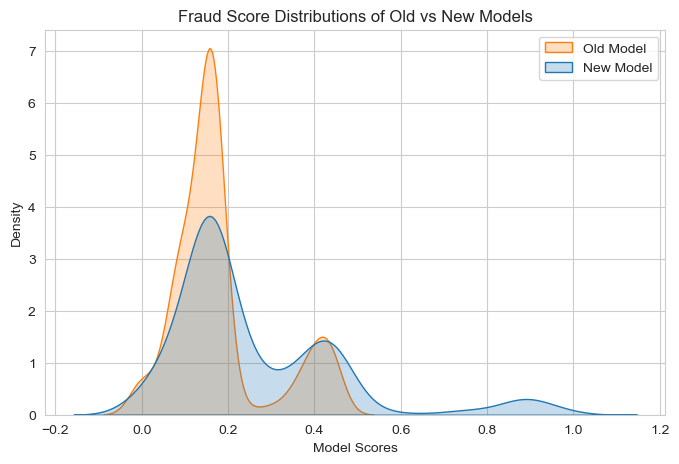


Summary Statistics for Model Scores (Confirmed Fraudsters Only):
       oldModelScore  newModelScore
count     800.000000     800.000000
mean        0.178549       0.258890
std         0.112429       0.200307
min         0.000000       0.000000
25%         0.110526       0.151143
50%         0.159933       0.165282
75%         0.170088       0.375321
max         0.448365       0.990199


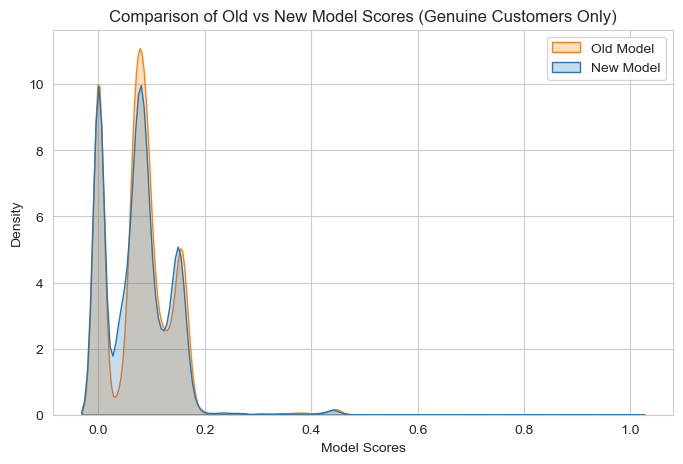


Summary Statistics for Model Scores (Genuine Customers Only):


,oldModelScore,newModelScore
count,10000.000000,10000.000000
mean,0.077518,0.074368
std,0.064287,0.067101
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.077838,0.075500
75%,0.106481,0.105596
max,0.658793,0.995500



For Confirmed Fraudsters, the New Model (0.259) has a higher mean fraud score than the Old Model (0.179)

For Genuine Customers, the Old Model (0.078) has a higher mean fraud score than the New Model (0.074)

KDE Plots show that the New Model has a more spread-out distribution, while the Old Model clusters scores more.



In [120]:
# ------------------------- #
# MODEL SCORE COMPARISON   #
# ------------------------- #

# Visualizing the distribution of old vs new model scores for the entire dataset
plt.figure(figsize=(8, 5))
sns.kdeplot(df_cleaned["oldModelScore"], label="Old Model", shade=True, color="tab:orange")
sns.kdeplot(df_cleaned["newModelScore"], label="New Model", shade=True, color="tab:blue")
plt.title("Comparison of Old vs New Model Scores (Entire Dataset)")

# Explicitly setting more generic x-axis label
plt.xlabel("Model Scores")

plt.legend()
plt.show()

# Print summary statistics for model scores across ALL transactions
print("Summary Statistics for Model Scores (Entire Dataset):")
summary_all = df_cleaned[['oldModelScore', 'newModelScore']].describe()
print(summary_all)


# ------------------------ #
# FRAUD-SPECIFIC ANALYSIS  #
# ------------------------ #

# Ensure columns are in the correct type
df_cleaned['isFraud'] = df_cleaned['isFraud'].astype(int)

# Separate fraud (Confirmed Fraudsters) and non-fraud cases (Genuine Customers)
fraud_cases = df_cleaned[df_cleaned["isFraud"] == 1]
non_fraud_cases = df_cleaned[df_cleaned["isFraud"] == 0]

# Visualizing the distribution of old vs new model scores for Confirmed Fraudsters ONLY 
# Plotting the Fraud Score Distributions for both models
plt.figure(figsize=(8, 5))
sns.kdeplot(fraud_cases["oldModelScore"], label="Old Model", shade=True, color="tab:orange")
sns.kdeplot(fraud_cases["newModelScore"], label="New Model", shade=True, color="tab:blue")
# plt.title("Comparison of Old vs New Model Fraud Scores (i.e. for Confirmed Fraudsters)")
plt.title("Fraud Score Distributions of Old vs New Models") # better title than above

# Explicitly setting more generic x-axis label
plt.xlabel("Model Scores")

plt.legend()
plt.show()

# Calculate summary statistics for old and new model scores for Confirmed Fraudsters ONLY
summary_fraud = pd.concat([
    fraud_cases["oldModelScore"].describe(),
    fraud_cases["newModelScore"].describe()
], axis=1)

# Print the results for Confirmed Fraudsters
print("\nSummary Statistics for Model Scores (Confirmed Fraudsters Only):")
print(summary_fraud)

# Take mean fraud scores from above stats
mean_old_score_fraud = summary_fraud.loc["mean", "oldModelScore"]
mean_new_score_fraud = summary_fraud.loc["mean", "newModelScore"]

# Determine which model has higher mean fraud score i.e. among the mean model scores for Confirmed Fraudsters
if mean_old_score_fraud > mean_new_score_fraud:
    higher_model_fraud, higher_score_fraud = "Old Model", mean_old_score_fraud
    lower_model_fraud, lower_score_fraud = "New Model", mean_new_score_fraud
else:
    higher_model_fraud, higher_score_fraud = "New Model", mean_new_score_fraud
    lower_model_fraud, lower_score_fraud = "Old Model", mean_old_score_fraud


# ------------------------------ #
# ANALYSIS FOR GENUINE CUSTOMERS #
# ------------------------------ #


# Visualizing the distribution of old vs new model scores for Genuine Customers
plt.figure(figsize=(8, 5))
sns.kdeplot(non_fraud_cases["oldModelScore"], label="Old Model", shade=True, color="tab:orange")
sns.kdeplot(non_fraud_cases["newModelScore"], label="New Model", shade=True, color="tab:blue")
plt.title("Comparison of Old vs New Model Scores (Genuine Customers Only)")

# Explicitly setting more generic x-axis label
plt.xlabel("Model Scores")

plt.legend()
plt.show()

# Calculate summary statistics for old and new model scores for Genuine Customers
summary_non_fraud = non_fraud_cases[['oldModelScore', 'newModelScore']].describe()

# Print summary stats for Genuine Customers
print("\nSummary Statistics for Model Scores (Genuine Customers Only):")
display(summary_non_fraud)

# Take mean non-fraud scores (of Genuine Customers) from above stats
mean_old_score_non_fraud = summary_non_fraud.loc["mean", "oldModelScore"]
mean_new_score_non_fraud = summary_non_fraud.loc["mean", "newModelScore"]

# Determine which model has higher non-fraud score i.e. among the mean model scores for Genuine Customers
if mean_old_score_non_fraud > mean_new_score_non_fraud:
    higher_model_non_fraud, higher_score_non_fraud = "Old Model", mean_old_score_non_fraud
    lower_model_non_fraud, lower_score_non_fraud = "New Model", mean_new_score_non_fraud
else:
    higher_model_non_fraud, higher_score_non_fraud = "New Model", mean_new_score_non_fraud
    lower_model_non_fraud, lower_score_non_fraud = "Old Model", mean_old_score_non_fraud

# Display result for Confirmed Fraudsters
print(f"\nFor Confirmed Fraudsters, the {higher_model_fraud} ({higher_score_fraud:.3f}) has a higher mean fraud score than the {lower_model_fraud} ({lower_score_fraud:.3f})")

# Display result for Genuine Customers
print(f"\nFor Genuine Customers, the {higher_model_non_fraud} ({higher_score_non_fraud:.3f}) has a higher mean fraud score than the {lower_model_non_fraud} ({lower_score_non_fraud:.3f})")

# Key insights w.r.t. KDE plots
key_insights_kde = ("\nKDE Plots show that the New Model has a more spread-out distribution, while the Old Model clusters scores more.\n")

# Print Key Insights
print(key_insights_kde)




#### **Key Findings from Fraud Score Distributions**
- The **New Model has a wider score distribution**, whereas the **Old Model clusters scores more tightly**.
- A **higher mean fraud score** for confirmed fraudsters suggests the **New Model is better at distinguishing fraud**.


#### **Key Findings from Model Performance for Fraudsters and Genuine Customers**
- **For confirmed fraudsters**, the **New Model assigns higher fraud scores** than the Old Model (**0.259 vs. 0.179**).
- **For genuine customers**, the **Old Model assigns slightly higher fraud scores** than the New Model (**0.078 vs. 0.074**).
- **Overall, the New Model improves fraud detection while reducing false positives.**



### **6.3 Threshold-Based Fraud Prevention**
- Fraud detection models use **thresholds** to determine which transactions to block.
- **Threshold analysis** compares fraud detection rates at different score thresholds.

### **6.4 Precision-Recall & AUC-ROC Analysis**
- **Precision-Recall Curve**: Measures how well the model **balances fraud detection and false positives**.
- **AUC-ROC Curve**: Evaluates the model’s ability to **distinguish fraudsters from genuine customers**.



Threshold Analysis:



,Threshold,Old Model Fraud Detections,New Model Fraud Detections
0,0.0,800,800
1,0.1,625,692
2,0.2,143,318
3,0.3,135,246
4,0.4,79,182
5,0.5,0,55
6,0.6,0,48
7,0.7,0,47
8,0.8,0,40
9,0.9,0,13


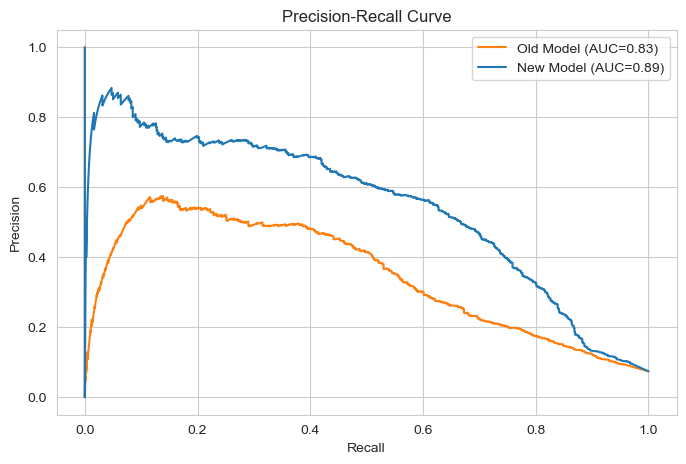

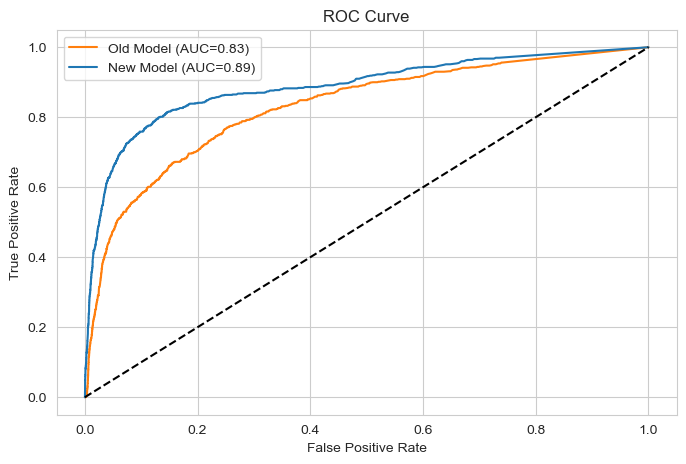


AUC-ROC Scores:
Old Model: 0.829
New Model: 0.886

Model Performance Insights:

As found earlier, the New Model (0.259) has a higher mean fraud score than the Old Model (0.179)


Threshold Analysis shows that, at various thresholds, the New Model captures more fraudsters at higher thresholds.

Precision-Recall Analysis shows that the New Model has better recall while maintaining reasonable precision.
AUC-ROC comparison shows that Old Model 0.829 vs. New Model 0.886

Recommendation: Since the New Model demonstrates better fraud detection capabilities, with a higher mean fraud score for fraudsters and better separation in AUC-ROC, it is recommended to adopt the New Model.



In [123]:

from sklearn.metrics import precision_recall_curve, roc_curve, auc

# ---- Threshold Analysis ----
thresholds = np.linspace(0, 1, 11)  # Define 10 thresholds between 0 and 1

fraud_detection_results = []
for t in thresholds:
    old_captured = (fraud_cases["oldModelScore"] >= t).sum()
    new_captured = (fraud_cases["newModelScore"] >= t).sum()
    fraud_detection_results.append([t, old_captured, new_captured])

# Convert results to DataFrame
threshold_analysis = pd.DataFrame(fraud_detection_results, columns=["Threshold", "Old Model Fraud Detections", "New Model Fraud Detections"])

# Display results of Threshold Analysis
print("\nThreshold Analysis:\n")
display(threshold_analysis)

# ---- Precision-Recall & AUC-ROC Analysis ----
precision_old, recall_old, _ = precision_recall_curve(df_cleaned["isFraud"], df_cleaned["oldModelScore"])
precision_new, recall_new, _ = precision_recall_curve(df_cleaned["isFraud"], df_cleaned["newModelScore"])

fpr_old, tpr_old, _ = roc_curve(df_cleaned["isFraud"], df_cleaned["oldModelScore"])
fpr_new, tpr_new, _ = roc_curve(df_cleaned["isFraud"], df_cleaned["newModelScore"])

auc_old = auc(fpr_old, tpr_old)
auc_new = auc(fpr_new, tpr_new)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall_old, precision_old, label=f"Old Model (AUC={auc_old:.2f})", color="tab:orange")
plt.plot(recall_new, precision_new, label=f"New Model (AUC={auc_new:.2f})", color="tab:blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Plot AUC-ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_old, tpr_old, label=f"Old Model (AUC={auc_old:.2f})", color="tab:orange")
plt.plot(fpr_new, tpr_new, label=f"New Model (AUC={auc_new:.2f})", color="tab:blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Display final AUC scores
print("\nAUC-ROC Scores:")
print(f"Old Model: {auc_old:.3f}")
print(f"New Model: {auc_new:.3f}")

# Repeating the comparison of mean model scores for Confirmed Fraudsters as these more important than mean model scores of Genuine Customers
final_comparison = f"\nAs found earlier, the {higher_model_fraud} ({higher_score_fraud:.3f}) has a higher mean fraud score than the {lower_model_fraud} ({lower_score_fraud:.3f})\n"

# Key insights w.r.t. Threshold Analysis, Precision-Recall & AUC-ROC Analysis
key_insights_threshold_prec_rec_roc = f"""
Threshold Analysis shows that, at various thresholds, the New Model captures more fraudsters at higher thresholds.

Precision-Recall Analysis shows that the New Model has better recall while maintaining reasonable precision.
AUC-ROC comparison shows that Old Model {auc_old:.3f} vs. New Model {auc_new:.3f}

Recommendation: Since the New Model demonstrates better fraud detection capabilities, with a higher mean fraud score for fraudsters and better separation in AUC-ROC, it is recommended to adopt the New Model.
"""

# # Print Model Performance Insights
print("\nModel Performance Insights:")
print(final_comparison)
print(key_insights_threshold_prec_rec_roc)


#### **Key Findings for Threshold-Based Fraud Prevention**
- At **higher thresholds**, the **New Model captures more fraud cases** than the Old Model.
- This suggests that **stricter threshold policies can improve fraud prevention from Day 1**.

#### **Key Findings for Precision-Recall & AUC-ROC Analysis**
- **AUC-ROC Scores**:  
  - **Old Model**: **0.829**  
  - **New Model**: **0.886**  
  - The **New Model shows superior fraud detection capabilities**.
- **Precision-Recall Analysis** confirms that the **New Model has better recall**, meaning it captures more fraudsters while maintaining reasonable precision.


### **Final Insights & Recommendation**
- The **New Model consistently outperforms the Old Model** across all metrics.
- **Higher fraud scores for fraudsters** and **better AUC-ROC separation** indicate **improved fraud detection**.
- **Threshold analysis suggests adjusting fraud score cutoffs** to optimize detection without excessive false positives.
- **Recommendation**: **Adopt the New Model** for better fraud prevention.

## **7. Fraud Prevention Rules & Performance Evaluation**

Fraud detection rules were formulated based on key fraud indicators and model insights from **EDA** and **Model Comparison** sections. This section outlines the rules designed to detect fraudulent transactions and evaluates their effectiveness using metrics like Precision and Recall (definitions below).

### **Fraud Rule Performance Evaluation**
To assess effectiveness of fraud rules, compute:
- **True Positives** (TP): Fraudulent transactions correctly flagged.
- **False Positives** (FP): Genuine transactions mistakenly flagged.
- **Recall**: % of total fraud cases that were detected.
- **Precision**: % of flagged transactions that were actual fraud.

A **good fraud detection system** should have:
- **High Recall (catch most fraudsters)**
- **High Precision (minimize false positives)**  

### **7.1 Rule A**
### Rule A is the initial Fraud Detection Rule created here, which focus on detecting fraud on commonly observed fraud behaviors:
1. **Multiple Orders on the Same Day**: If a customer places **5 or more orders** in 24 hours, they get flagged.
2. **High Fraud Score & Unusual Payment Method**: If a transaction has a **fraud score > 0.6** and uses an **unusual payment method**, they get flagged.
3. **New Accounts Making Large Transactions**: If an account is **less than 30 days old** and makes a **high-value purchase (>75th percentile)**, they get flagged.
4. **Transactions During Peak Fraud Hours (4 PM - 9 PM) with High Scores**: Transactions in **high-risk hours** with a high **fraud score** are flagged.
5. **Transactions on High-Risk Days with High Scores**: Fraud activity is often observed on these days, so **high-score transactions** occurring on **Wed/Thu** are flagged.


In [128]:

# rule 1: Customers placing many orders (5 or more) in single day; orderNumberFeature42 has moderate correlation with Fraud (as seen from EDA)
customer_daily_orders = df_cleaned.groupby(['customerId', df_cleaned['orderTime'].dt.date])['orderNumberFeature42'].count()
high_risk_customers = customer_daily_orders[customer_daily_orders >= 5].index.get_level_values(0).unique()

# rule 2: High fraud score & many payment methods; newModelScore used as new model outperforms old model in model comparison 
high_risk_payments = (df_cleaned['newModelScore'] > 0.6) & \
                     (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].median())

# rule 3: New accounts with large transactions
new_account_high_value = (df_cleaned['accountAgeFeature12'] < 30) & \
                         (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.75))

# rule 4: Transactions in peak fraud hours (4 PM - 9 PM) with high fraud score
peak_hours_fraud = (df_cleaned['orderTime'].dt.hour >= 16) & (df_cleaned['orderTime'].dt.hour <= 21) & \
                   (df_cleaned['newModelScore'] > 0.6)

# rule 5: Transactions on high risk days (Wednesday & Thursday) with high fraud scores
high_risk_days_fraud = df_cleaned['orderTime'].dt.day_name().isin(["Wednesday", "Thursday"]) & \
                       (df_cleaned['newModelScore'] > 0.6)

# Rule A - Applying all above fraud rules together for a combined strong rule
fraud_risk = df_cleaned[
    (df_cleaned['customerId'].isin(high_risk_customers)) |
    high_risk_payments |
    new_account_high_value |
    peak_hours_fraud |
    high_risk_days_fraud
]

# Print number of flagged transactions
print(f"\nPotential high-Risk transactions detected based on the combined rule, Rule A: {len(fraud_risk)}")

# Save high risk transactions according to Final Rule 1
fraud_risk.to_csv("High_risk_transactions_rule_A.csv", index=False)



Potential high-Risk transactions detected based on the combined rule, Rule A: 164


#### **Performance Evaluation of Rule A**
#### The performance evaluation of Rule A shows:
- **Precision**: **76.83%** (Best precision i.e. lowest false positives => most flagged transactions are actual fraud)
- **Recall**: **15.75%** (Recall is low => misses many fraud cases)
- **Conclusion**: **Good precision but weak recall, meaning most flagged transactions are actual fraud but many fraud cases are being missed too.**
  

In [130]:
# Check fraud status of flagged transactions
fraud_risk['isFraud'] = fraud_risk['customerStatus'] == "confirmed_fraudster"

# Compute True Positives (TP) and False Positives (FP)
TP = fraud_risk['isFraud'].sum()
FP = len(fraud_risk) - TP

# Compute Precision & Recall
total_fraud_cases = df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]
FN = len(total_fraud_cases) - TP  # False Negatives (missed fraud cases)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"\nFraud Detection Rule Performance of: Rule A")
print(f"\nTrue Positives (Fraud Detected Correctly): {TP}")
print(f"False Positives (Genuine Transactions Flagged as Fraud): {FP}")
print(f"Precision (Accuracy of Fraud Flagging): {precision:.2%}")
print(f"Recall (Fraud Cases Identified): {recall:.2%}")



Fraud Detection Rule Performance of: Rule A

True Positives (Fraud Detected Correctly): 126
False Positives (Genuine Transactions Flagged as Fraud): 38
Precision (Accuracy of Fraud Flagging): 76.83%
Recall (Fraud Cases Identified): 15.75%


### **7.2 Rule B**
### Rule B is a stricter version of Rule A as seen below:
1. **Frequent Orders on Same Day**: Customers placing **5 or more orders per day** are flagged.
2. **High Fraud Score & Multiple Payment Methods**: If transaction has **fraud score > 0.6** and uses an **unusual payment method**, they are flagged.
3. **New Accounts Making Large Transactions**: Accounts **less than 30 days old** that make **high-value transactions (>75th percentile)** are flagged.
4. **Stricter Version**: Additional condition – only flag customers **with 5 or more orders if fraud score > 0.5**.


In [132]:

# Count no. of transactions per customer per day; as orderNumberFeature42 has moderate correlation with Fraud (as seen from EDA)
customer_daily_orders = df_cleaned.groupby(['customerId', df_cleaned['orderTime'].dt.date])['orderNumberFeature42'].count()

# Get customer id who placed 5 or more orders on same day
high_risk_customers = customer_daily_orders[customer_daily_orders >= 5].index.get_level_values(0).unique()

# Filter transactions for high risk customers who placed 5 or more orders on same day
fraud_risk = df_cleaned[df_cleaned['customerId'].isin(high_risk_customers)]

# Show result for high risk transactions with customers who placed 5 or more orders on same day
# print(f"\nPotential high-risk transactions detected based on 5 or more orders on same day: {len(fraud_risk)}")


# Combining above rule with other rules
fraud_risk = df_cleaned[
    # rule 1: Many orders (5 or more) on SAME DAY
    (df_cleaned['customerId'].isin(high_risk_customers)) | 
    
    # rule 2: High fraud score & multiple payment methods
    ((df_cleaned['newModelScore'] > 0.6) & 
     (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].median())) | 
    
    # rule 3: New accounts (less than 30) making high value orders
    ((df_cleaned['accountAgeFeature12'] < 30) & 
     (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.75)))
]

# Show result for high risk transactions output from combination of above 3 rules
# print(f"\nPotential high-risk transactions detected based on initial combined rule (initial version of Rule B): {len(fraud_risk)}")

# Save high risk transactions output from combination of above 3 rules - this is initial version of Rule B
fraud_risk.to_csv("High_risk_transactions_initial_rule_B.csv", index=False)


# Rule B = initial version of Rule B from above + new model score added to 5 or more orders part (to make it more strict)
fraud_risk = df_cleaned[
    ((df_cleaned['customerId'].map(df_cleaned['customerId'].value_counts()) >= 5) & (df_cleaned['newModelScore'] > 0.5)) | 
    ((df_cleaned['newModelScore'] > 0.6) & (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].median())) | 
    ((df_cleaned['accountAgeFeature12'] < 30) & (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.75)))
]

# Show result for high risk transactions according to Rule B
print(f"\nPotential high-Risk transactions detected based on the combined rule, Rule B: {len(fraud_risk)}")

# Save high risk transactions according to Rule B
fraud_risk.to_csv("High_risk_transactions_rule_B.csv", index=False)




Potential high-Risk transactions detected based on the combined rule, Rule B: 71


#### **Performance Evaluation of Rule B**
#### The performance evaluation of Rule B shows:
- **Precision**: **52.11%** (fairly good, but not as strong as Rule A)
- **Recall**: **4.62%** (worse than Rule A, missing even more fraud cases)
- **Conclusion**: **Stricter than Rule A but not significantly better, leading to fewer fraud cases detected.**


In [134]:
# Check fraud status of flagged transactions for Rule B
fraud_risk_rule2 = df_cleaned[
    ((df_cleaned['customerId'].map(df_cleaned['customerId'].value_counts()) >= 5) & (df_cleaned['newModelScore'] > 0.5)) | 
    ((df_cleaned['newModelScore'] > 0.6) & (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].median())) | 
    ((df_cleaned['accountAgeFeature12'] < 30) & (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.75)))
]

fraud_risk_rule2['isFraud'] = fraud_risk_rule2['customerStatus'] == "confirmed_fraudster"

# Compute True Positives (TP) and False Positives (FP) for Rule B
TP_rule2 = fraud_risk_rule2['isFraud'].sum()
FP_rule2 = len(fraud_risk_rule2) - TP_rule2

# Compute Precision & Recall for Rule B
total_fraud_cases = df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]
FN_rule2 = len(total_fraud_cases) - TP_rule2  # False Negatives (missed fraud cases)

precision_rule2 = TP_rule2 / (TP_rule2 + FP_rule2) if (TP_rule2 + FP_rule2) > 0 else 0
recall_rule2 = TP_rule2 / (TP_rule2 + FN_rule2) if (TP_rule2 + FN_rule2) > 0 else 0

print("\nFraud Detection Rule Performance of: Rule B")
print("\nTrue Positives (Fraud Detected Correctly):", TP_rule2)
print("False Positives (Genuine Transactions Flagged as Fraud):", FP_rule2)
print("Precision (Accuracy of Fraud Flagging): {:.2%}".format(precision_rule2))
print("Recall (Fraud Cases Identified): {:.2%}".format(recall_rule2))



Fraud Detection Rule Performance of: Rule B

True Positives (Fraud Detected Correctly): 37
False Positives (Genuine Transactions Flagged as Fraud): 34
Precision (Accuracy of Fraud Flagging): 52.11%
Recall (Fraud Cases Identified): 4.62%


### **7.3 Rule C**
### Rule C introduces **tighter fraud detection criteria** still keeping false positives low as possible:
1. **Very High Fraud Score**: Any transaction **with fraud score > 0.6** are flagged.
2. **Time-Based Fraud Detection (Stricter Version)**: If customer places **5 or more orders within 6 hours** and has a **fraud score > 0.6**, they are flagged.
3. **Unusual Payment Method Activity**: If a transaction has a **fraud score > 0.65** and uses an **uncommon payment method**, they are flagged.
4. **High-Value Transactions from New Accounts**: If an account is **less than 20 days old** and places **high-value order (>85th percentile)**, it is flagged.
5. **Excluding Legitimate Customers**: Customers **with a large account network size** are not flagged unless they have a **fraud score > 0.6**.


In [136]:
# Extract order hour from timestamp
df_cleaned['order_hour'] = df_cleaned['orderTime'].dt.hour

# Count orders per 6-hour window (less aggressive, reducing false positives)
df_cleaned['orders_in_6h'] = df_cleaned.groupby(['customerId', 'order_hour'])['orderNumberFeature42'].transform('count')

# Stricter fraud detection rules to improve precision
fraud_risk_final = df_cleaned[
    # Very high fraud score → Strongest fraud indicator
    (df_cleaned['newModelScore'] > 0.6) |

    # More realistic time-based detection (avoid n bulk buyers)
    ((df_cleaned['orders_in_6h'] >= 5) & (df_cleaned['newModelScore'] > 0.6)) |

    # Payment method anomalies only flagged if fraud score is very high
    ((df_cleaned['newModelScore'] > 0.65) & (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].quantile(0.8))) |

    # Account are new & high-value transaction (tighter restrictions)
    ((df_cleaned['accountAgeFeature12'] < 20) & (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.85))) |

    # Excluding known legitimate users (reducing false positive)
    ((df_cleaned['networkGeneralSizeFeature25'] < df_cleaned['networkGeneralSizeFeature25'].quantile(0.3)) & (df_cleaned['newModelScore'] > 0.6))
]

print(f"\nPotential high-Risk transactions detected based on Rule C: {len(fraud_risk_final)}")

# result saved
fraud_risk_final.to_csv("High_risk_transactions_rule_C.csv", index=False)



Potential high-Risk transactions detected based on Rule C: 64


#### **Performance Evaluation of Rule C**
#### The performance evaluation of Rule C shows:
- **Precision**: **75.00%** (Excellent precision, similar to Rule A)
- **Recall**: **6.00%** (Recall is too low, even lower than Rule A)
- **Conclusion**: **Rule C is a Precision-Optimized Rule (i.e. maintains high precision) but still struggles with recall.**
  

In [138]:
# Check fraud status of flagged transactions
fraud_risk_final['isFraud'] = fraud_risk_final['customerStatus'] == "confirmed_fraudster"

# Compute True Positives (TP) and False Positives (FP)
TP_final = fraud_risk_final['isFraud'].sum()
FP_final = len(fraud_risk_final) - TP_final

# Compute Precision & Recall
total_fraud_cases = df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]
FN_final = len(total_fraud_cases) - TP_final  # False Negatives (missed fraud cases)

precision_final = TP_final / (TP_final + FP_final) if (TP_final + FP_final) > 0 else 0
recall_final = TP_final / (TP_final + FN_final) if (TP_final + FN_final) > 0 else 0

print("\nFraud Detection Rule Performance of: Rule C")
print(f"\nTrue Positives (Fraud Detected Correctly): {TP_final}")
print(f"False Positives (Genuine Transactions Flagged as Fraud): {FP_final}")
print(f"Precision (Accuracy of Fraud Flagging): {precision_final:.2%}")
print(f"Recall (Fraud Cases Identified): {recall_final:.2%}")



Fraud Detection Rule Performance of: Rule C

True Positives (Fraud Detected Correctly): 48
False Positives (Genuine Transactions Flagged as Fraud): 16
Precision (Accuracy of Fraud Flagging): 75.00%
Recall (Fraud Cases Identified): 6.00%


### **7.4 Rule D**
### Rule D is **a further refinement of Rule C** to **capture more fraud cases while keeping false positives manageable**:
1. **Uses Rule A as core**: include high-precision fraud indicators.
2. **Stricter Time-Based Fraud Detection**: Customers making **4 or more transactions in 5 hours** with a **fraud score > 0.58** is flagged.
3. **Unusual Payment Method Activity (Stricter)**: If fraud score is **above 0.6** and **payment method is highly unusual (>95th percentile distance)**, they are flagged.
4. **High-Value Transactions from New Accounts (Refined)**: Accounts **less than 25 days old** making **large purchases (>90th percentile)** are flagged.
5. **Short Time Between Orders**: Customers who place **multiple orders in very short intervals (bottom 10% of order time gaps)** is flagged.


In [140]:
# Extract order hour frm timestamp
df_cleaned['order_hour'] = df_cleaned['orderTime'].dt.hour

# Count orders per 5 hr window (strict than previous versions)
df_cleaned['orders_in_5h'] = df_cleaned.groupby(['customerId', 'order_hour'])['orderNumberFeature42'].transform('count')

# Rule D
fraud_risk_final = df_cleaned[
    # Keep initial rules as the core
    (df_cleaned['customerId'].isin(high_risk_customers)) |
    ((df_cleaned['newModelScore'] > 0.6) & (df_cleaned['paymentMethodDistanceFeature12'] > df_cleaned['paymentMethodDistanceFeature12'].quantile(0.95))) |

    # Stricter time based fraud rule
    ((df_cleaned['orders_in_5h'] >= 4) & (df_cleaned['newModelScore'] > 0.58)) |

    # Keep refined account age & high-value order rule (but more precise)
    ((df_cleaned['accountAgeFeature12'] < 25) & (df_cleaned['totalOrderValueFeature1'] > df_cleaned['totalOrderValueFeature1'].quantile(0.9))) |

    # Keep short time between orders but stricter (avoid false positives)
    (df_cleaned['timeBetweenOrdersFeature15'] < df_cleaned['timeBetweenOrdersFeature15'].quantile(0.1))
]

print(f"\nPotential high-Risk transactions detected based on Rule D: {len(fraud_risk_final)}")

# result save
fraud_risk_final.to_csv("High_risk_transactions_rule_D.csv", index=False)



Potential high-Risk transactions detected based on Rule D: 935


#### **Performance Evaluation of Rule D**
#### The performance evaluation of Rule D shows:
- **Precision**: **21.60%** (lower than previous rules but still acceptable)
- **Recall**: **25.25%** (much better than Rule A, B, and C) - good
- **Conclusion**: **Best recall so far but lower precision. Rule D gives balanced Precision & Recall values i.e. it capture more fraud cases while keeping false positives manageable.**


In [142]:
# Check fraud status of flagged transactions
fraud_risk_final['isFraud'] = fraud_risk_final['customerStatus'] == "confirmed_fraudster"

# Compute True Positives (TP) and False Positives (FP)
TP_final = fraud_risk_final['isFraud'].sum()
FP_final = len(fraud_risk_final) - TP_final

# Compute Precision & Recall
total_fraud_cases = df_cleaned[df_cleaned['customerStatus'] == "confirmed_fraudster"]
FN_final = len(total_fraud_cases) - TP_final  # False Negatives (missed fraud cases)

precision_final = TP_final / (TP_final + FP_final) if (TP_final + FP_final) > 0 else 0
recall_final = TP_final / (TP_final + FN_final) if (TP_final + FN_final) > 0 else 0

print("\nFraud Detection Rule Performance of: Rule D")
print(f"\nTrue Positives (Fraud Detected Correctly): {TP_final}")
print(f"False Positives (Genuine Transactions Flagged as Fraud): {FP_final}")
print(f"Precision (Accuracy of Fraud Flagging): {precision_final:.2%}")
print(f"Recall (Fraud Cases Identified): {recall_final:.2%}")



Fraud Detection Rule Performance of: Rule D

True Positives (Fraud Detected Correctly): 202
False Positives (Genuine Transactions Flagged as Fraud): 733
Precision (Accuracy of Fraud Flagging): 21.60%
Recall (Fraud Cases Identified): 25.25%


### **Final Decision: Which Rules to Keep?**

After evaluating all fraud detection rules based on precision and recall, best approach is **keep Rule A and Rule D** while discarding Rules B and C.

#### **Why Keep Rule A?**  
- Acts as **strict fraud prevention rule** with the **highest precision (76.83%)**.  
- Flags **high-confidence fraud cases** and minimizing false positives.  
- Ensure **legitimate customers are not mistakenly blocked**, which is critical for business operations.  

#### **Why Keep Rule D?**  
- Provides **better recall (25.25%)** compared to other rules, meaning it **capture more fraud cases**.  
- **Balances fraud detection and false positives** better than Rule B or Rule C.  
- Prevents fraudsters **without overly restricting genuine transactions**, reducing potential revenue loss.

#### **Why Discard Rule B and Rule C?**  
- **Rule B** had **low recall (4.62%)**, meaning it **missed too many fraudsters** compared to Rule A.  
- **Rule C** had similar precision to Rule A but **did not offer significant improvement**, making it unnecessary.

#### **Final Conclusion**  
The implemented fraud rules demonstrate a **structured, iterative approach** to rule-based fraud detection. Rule A ensure **strict, high-precision fraud detection**, Rule D **improves recall without excessive false positives**. While **the current solution is not perfect**, it provides a **well-balanced tradeoff between fraud detection and minimizing false positives**. The next steps outlined below would further refine these rules to provide a **strong fraud prevention system** that balances **accuracy and business impact**.


Thus, final recommendation is to **keep Rule A and Rule D** and **discard Rule B and Rule C**.

---

### **Future Improvements**
While the implemented rules effectively detect fraud, further refinements could enhance their accuracy:

#### **1. Better Feature Engineering**  
- Include **new fraud indicators** such as **device fingerprinting, geolocation tracking, and transaction frequency trends**.  
- Improve **customer behavior profiling** to **differentiate between fraudsters & genuine users** more accurately.  

#### **2. Adaptive Fraud Thresholds**  
- Instead of relying on **fixed score cutoffs**, introduce **dynamic fraud thresholds** that adapt to evolving fraud patterns.  

#### **3. Machine Learning-Based Approaches**  
- Explore **supervised models (logistic regression, decision trees, anomaly detection)** to **enhance fraud detection accuracy**.  
- Use **unsupervised learning** for **anomaly detection in unknown fraud patterns**.  

#### **4. Fraud Scoring System**  
- Instead of rigid rule-based flags, develop a **risk-scoring model** where transactions accumulate points based on fraud indicators.  

#### **5. Business Context Validation**  
- Work with fraud analysts to **analyze real fraud cases** and refine the rule-based system accordingly.  
- Ensure that fraud detection **aligns with industry trends and business needs** to minimize losses.  

By implementing these improvements, fraud detection can become **more adaptive, efficient, and business-friendly**, ensuring **maximum fraud prevention while minimizing false positives**.


## **8. Conclusion & Business Recommendations**

### **Key Takeaways**
- **New Model vs. Old Model**: The **new model outperforms the old one** (AUC-ROC: **0.886 vs. 0.829**), making it the preferred choice for fraud detection.
- **Fraud Patterns**: Fraudsters **favor new accounts, unusual payment methods, and transact during peak hours (4 PM - 9 PM) and high-risk days (Wednesdays & Thursdays).**
- **Best Fraud Prevention Rules**: **Rule A (high precision, minimal false positives) and Rule D (higher recall, better fraud capture)** provide the strongest fraud prevention.
- **Balancing Fraud Detection & Business Impact**: **Dynamic fraud thresholds** are needed to **reduce false positives while improving recall**.
- **Data-Driven Prevention**: A **hybrid approach** combining **rules and model-driven scoring** is key for **adaptive fraud detection**.

### **Actionable Next Steps**
- **Fine-Tune Fraud Thresholds**: Optimize cutoff scores for **better fraud detection with fewer false positives**.
- **Enhance Detection Models**: Integrate **geolocation, transaction velocity, and advanced ML models** to improve accuracy.
- **Refine Fraud Rules**: **Continuously monitor and adapt** Rule A & Rule D based on evolving fraud trends.
- **Adopt Risk-Based Scoring**: Move toward **dynamic fraud scoring** instead of static rule-based detection.
- **Strengthen Time-Based Monitoring**: **Increase fraud monitoring during peak hours and high-risk days**.

By implementing these, **fraud detection will be more adaptive and efficient**, ensuring **stronger prevention with minimal business disruption**.
